In [1]:
%matplotlib inline
import os
import ElementsEnv

%erun SourceXtractorTools 0.1
import matplotlib.pyplot as plt
from Profiling import PlotRunProfile

In [2]:
def parse_logs(name, path='/home/aalvarez/Downloads/'):
    log = PlotRunProfile.read_sourcex_logs(os.path.join(path, f'sx_{name}.log'))
    pidstat = PlotRunProfile.read_pidstat(os.path.join(path, f'sx_{name}.pidstat'))
    return log, pidstat

In [3]:
lazy_log, lazy_pidstat = parse_logs('lazystamp')

WARN    : not enough values to unpack (expected 5, got 0)
2021-08-25T17:57:30CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


In [4]:
devel_log, devel_pidstat = parse_logs('develop')

WARN    : not enough values to unpack (expected 5, got 0)
2021-08-25T17:57:34CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


In [ ]:
tile_log, tile_pidstat = parse_logs('tilemmap')

WARN    : not enough values to unpack (expected 5, got 0)
2021-08-25T17:57:38CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


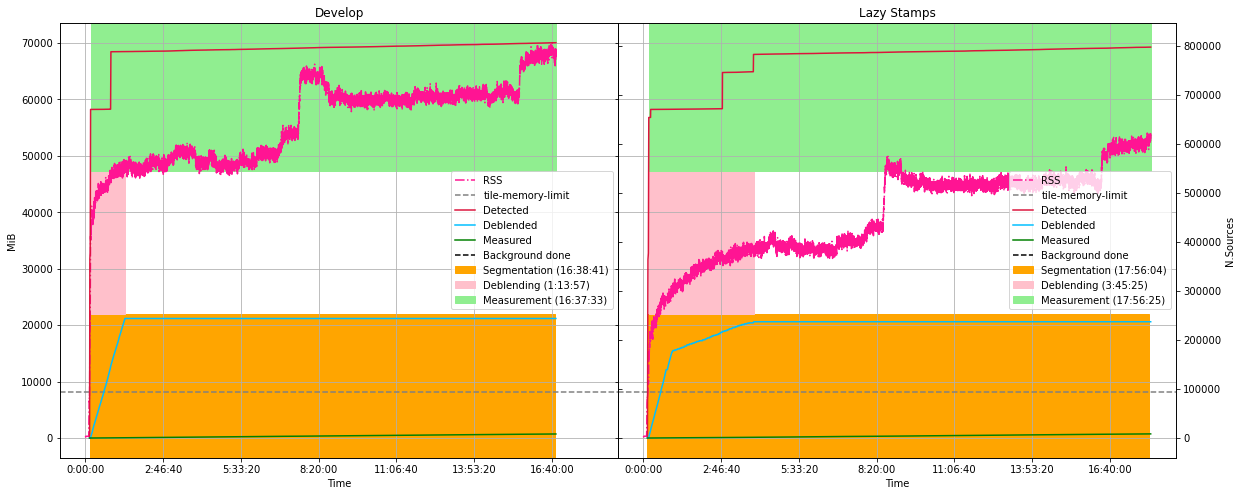

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0)

PlotRunProfile.plot_perf(lazy_pidstat, lazy_log, ax=axes[1], y_left='memory', y_right='sources')
axes[0].set_title('Develop')

PlotRunProfile.plot_perf(devel_pidstat, devel_log, ax=axes[0], y_left='memory', y_right='sources')
axes[1].set_title('Lazy Stamps')

axes[1].sharex(axes[0])
axes[1].sharey(axes[0])
plt.setp(axes[1].get_yticklabels(), visible=False)
plt.setp(axes[1].get_yaxis().get_label(), visible=False)

ax0_mem = axes[0]._twinned_axes.get_siblings(axes[0])[1]
ax0_mem.sharey(axes[0]._twinned_axes.get_siblings(axes[1])[1])
plt.setp(ax0_mem.get_yticklabels(), visible=False)
plt.setp(ax0_mem.get_yaxis().get_label(), visible=False)

plt.show()

In [ ]:
fig.savefig('/home/aalvarez/Downloads/lazystamps.png')

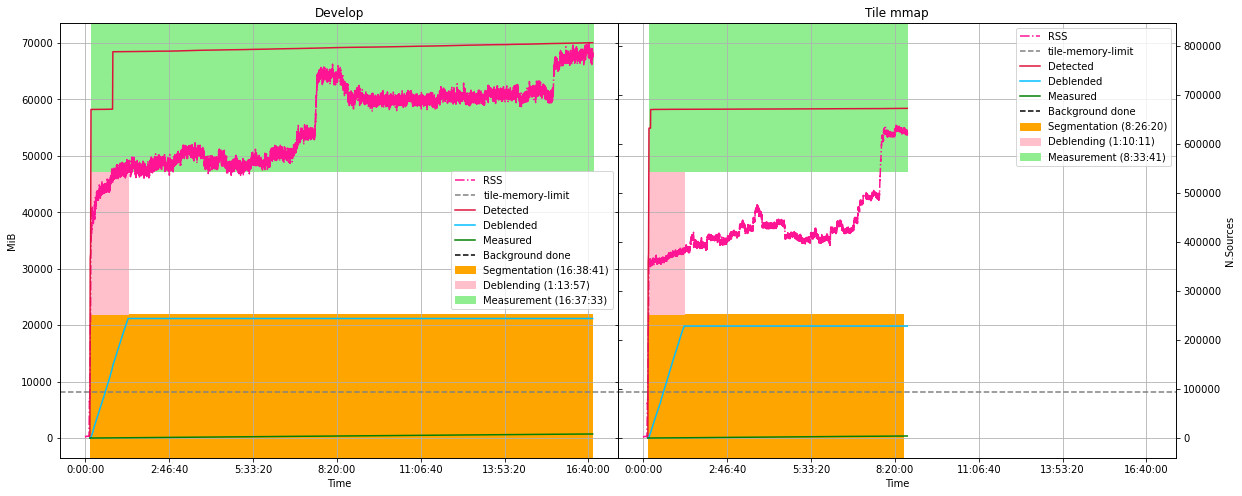

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0)

PlotRunProfile.plot_perf(devel_pidstat, devel_log, ax=axes[0], y_left='memory', y_right='sources')
axes[0].set_title('Develop')

PlotRunProfile.plot_perf(tile_pidstat, tile_log, ax=axes[1], y_left='memory', y_right='sources')
axes[1].set_title('Tile mmap')

axes[1].sharex(axes[0])
axes[1].sharey(axes[0])
plt.setp(axes[1].get_yticklabels(), visible=False)
plt.setp(axes[1].get_yaxis().get_label(), visible=False)

ax0_mem = axes[0]._twinned_axes.get_siblings(axes[0])[1]
ax0_mem.sharey(axes[0]._twinned_axes.get_siblings(axes[1])[1])
plt.setp(ax0_mem.get_yticklabels(), visible=False)
plt.setp(ax0_mem.get_yaxis().get_label(), visible=False)

plt.show()